In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv('dataset.csv')

In [3]:
# visualizing data
# head() shows the first 5 elements
df.head()

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158


In [4]:
# check data summary
df.describe

<bound method NDFrame.describe of      Humidity  Temperature
0    0.596606    13.182462
1    0.656572     8.156680
2    0.141856    32.713142
3    0.757360     6.282035
4    0.613228    12.675158
..        ...          ...
295  0.615160     3.892790
296  0.524208    15.616094
297  0.647608     4.596190
298  0.410353    18.160583
299  0.545477    12.561416

[300 rows x 2 columns]>

In [5]:
# To check if any null value is present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     300 non-null    float64
 1   Temperature  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [6]:
# data we got are in pandas dataframe format we need to cast it in numpy array for calulations
X = np.array(df.Humidity)
Y = np.array(df.Temperature)

In [7]:
# visualising the casted data
X,Y

(array([0.59660557, 0.6565718 , 0.14185593, 0.75736019, 0.6132277 ,
        1.        , 0.37765582, 0.81530631, 0.14710403, 0.54084904,
        0.40111164, 0.63795111, 0.50777642, 0.38660157, 0.26278949,
        0.55632409, 0.42536876, 0.28533024, 0.77777599, 0.48510097,
        0.33574147, 0.20408699, 0.45590515, 0.58986282, 0.69648899,
        0.56542957, 0.56236459, 0.50741162, 0.38802306, 0.33265169,
        0.32438614, 0.73042008, 0.53763537, 0.65501707, 0.40179825,
        0.3972744 , 0.76659457, 0.22934167, 0.53596045, 0.44169333,
        0.44045941, 0.53305128, 0.59670778, 0.46666197, 0.44827408,
        0.16963849, 0.54819735, 0.65141242, 0.59178375, 0.42459148,
        0.48198196, 0.65099628, 0.53705886, 0.60767965, 0.36413304,
        0.61034979, 0.40781685, 0.32579409, 0.45135186, 0.89737381,
        0.44387831, 0.49379625, 0.50898006, 0.7004272 , 0.52203071,
        0.08431073, 0.4324858 , 0.5785368 , 0.57279435, 0.4085181 ,
        0.5201755 , 0.70860478, 0.18006175, 0.74

In [8]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

In [9]:
# function to plot data points
def plot_points(X, Y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, Y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

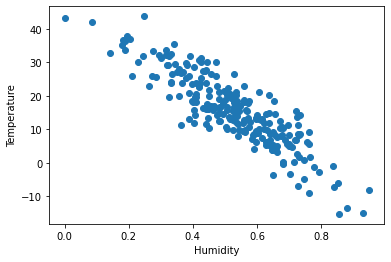

In [10]:
# plotting training points
plot_points(x_train,y_train, "Humidity", "Temperature")

In [11]:
# plots line of regression
def draw_line(x, m, c):
    x_vals=X;
    y_vals= m*X +c
    plt.plot(x_vals,y_vals,'--')

In [12]:
# plots points and lines
def draw_points_and_lines(X, Y, xlabel, ylabel, m,c):
    """Draws lines and points"""
    plot_points(X, Y, xlabel, ylabel)
    draw_line(X, m, c)

In [13]:
from sklearn.linear_model import SGDRegressor

In [14]:
x_train, x_train.shape

(array([0.43702028, 0.67833802, 0.7004272 , 0.40330459, 0.43072898,
        0.56018208, 0.38278595, 0.64173255, 0.33574147, 0.54819735,
        0.18799501, 0.48327635, 0.44779787, 0.50741162, 0.38676462,
        0.68095549, 0.22934167, 0.24761872, 0.48023985, 0.8521853 ,
        0.40771662, 0.73448474, 0.72406678, 0.40407575, 0.44369275,
        0.18135206, 0.47394877, 0.43275912, 0.56243375, 0.        ,
        0.18699904, 0.44827408, 0.3156027 , 0.46678895, 0.41915112,
        0.64052884, 0.63763071, 0.36413304, 0.65921664, 0.77777599,
        0.63694208, 0.55871954, 0.53718126, 0.79189752, 0.70860478,
        0.94887043, 0.62150176, 0.59661906, 0.30096179, 0.59663502,
        0.44250633, 0.3690206 , 0.65501707, 0.69838135, 0.6712664 ,
        0.44387831, 0.64708358, 0.66250005, 0.83895442, 0.20408699,
        0.33265169, 0.55746664, 0.42536876, 0.40781685, 0.34507447,
        0.6923967 , 0.61608646, 0.35691881, 0.93194103, 0.6132277 ,
        0.33288053, 0.33173701, 0.49379625, 0.57

In [15]:
x_train=x_train.reshape(-1,1)

In [16]:
# Training the model
reg= SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=10000, random_state=5, penalty='None')
reg.fit(x_train,y_train)

SGDRegressor(max_iter=10000, penalty='None', random_state=5)

In [17]:
# R2 score
reg.score(x_train,y_train)

0.7734510960525091

In [18]:
# slope
m=reg.coef_

In [19]:
# intercept
c=reg.intercept_

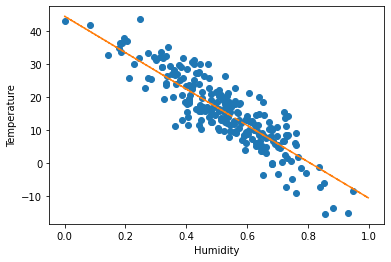

In [20]:
draw_points_and_lines(x_train, y_train, "Humidity", "Temperature", m, c)

In [21]:
# prediction
x_test=x_test.reshape(-1,1)
y_predict = reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,6.918243,8.280478
1,24.203971,25.082452
2,17.560260,16.593957
3,-5.433452,5.359387
4,9.650354,11.814586
5,-4.253388,2.443021
6,1.325959,6.264843
7,9.074647,14.327598
8,14.448332,14.978918
9,-4.202040,-8.325881


In [22]:
y_train_predict = reg.predict(x_train)
# Accuracy of train data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

Mean Absolute Error: 4.112497596308222
Mean Squared Error: 25.762318694002616
Root Mean Squared Error: 5.075659434398905


In [23]:
# Accuracy of test data
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4.002651241430504
Mean Squared Error: 26.435804715185238
Root Mean Squared Error: 5.141576092521167


In [24]:
# predict
reg.predict([[0.9]])

array([-5.03868744])